In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Power Law and Least Squares

Example: Consider the heart rate and typical mass for a set of $N=16$ mammals given here:  
<img src="img/mammal_heartrate_v_mass.png" style="width: 400px;"/>

We enter this raw data below in two arrays, using $x$ for mass (in kg), and $y$ for heart rate (in beats/minute).  For mammals with a range of masses given, the mean is used.

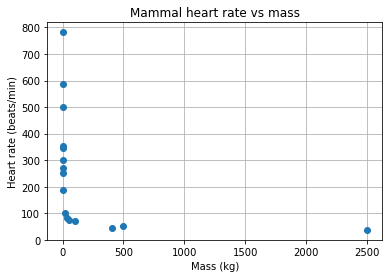

In [2]:
x = [.003, .006, .017, .103, .117, .252, .437, 1.34, 2.7 ,22, 33 ,50 ,100 ,405,500, 2500]
y = [782 ,588, 500, 347, 300, 352, 269 ,251, 187, 100, 81, 75, 70, 45, 50 ,37]
plt.plot(x,y,'o')
plt.xlabel('Mass (kg)')
plt.ylabel('Heart rate (beats/min)')
plt.title('Mammal heart rate vs mass')
plt.grid()
plt.show()

#### If there is a power law, i.e. $ y = A x^r $, then there will be a linear relation between $\log x$ and $\log y$:
#### $$ \log y = \log A + r \log x $$
When $x$ and $y$ are both plot in logarithm scales, the pattern is clear:

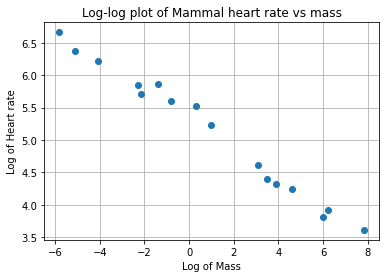

In [3]:
plt.plot(np.log(x),np.log(y),'o')
plt.xlabel('Log of Mass')
plt.ylabel('Log of Heart rate')
plt.title('Log-log plot of Mammal heart rate vs mass')
plt.grid()
plt.show()

#### What is the best fit line for this data?
We learnt in class that metabolic rate $q \sim M^{\frac{2}{3}}$, $M$ is mass. \
Suppose heart beat rate is $R$, and heart blood volume is $V_h$. Blood flow rate through body should be $R V_h$. \
Then metabolic rate $q \sim R V_h$. \
Assume $V_h \sim M$, so $R \sim \frac{q}{V_h} \sim \frac{M^{\frac{2}{3}}}{M}$. \
Hence, heart rate ~ $\text{mass}^{-\frac{1}{3}}$, slope of the linear fit line $-\frac{1}{3}$.

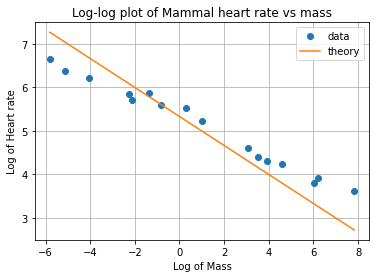

In [4]:
log_y_theory = np.polyval([-1/3, 5.33], np.log(x))
plt.plot(np.log(x),np.log(y),'o',label = 'data')
plt.plot(np.log(x),log_y_theory,label = 'theory')
plt.xlabel('Log of Mass')
plt.ylabel('Log of Heart rate')
plt.title('Log-log plot of Mammal heart rate vs mass')
plt.grid()
plt.legend()
plt.show()

This theory slope $-\frac{1}{3}$ fits the data OK, but not perfect. \
Instead, let us perform **least squares linear regression**. Let's write $\tilde y = \log y$ and $\tilde x = \log x$ so that we can perform ordinary least squares regression on the data $(\tilde x_i, \tilde y_i)$ for $i=1,\dots, 16$.

#### Approach 1: Solve the normal equation using NumPy linear algebra package
Rewrite $\tilde y = \beta_0 + \beta_1 \tilde x$ in matrix form:

*Design matrix* 
 \begin{equation}
 X = \begin{bmatrix} 
 1 & \tilde x_1 \\
 1 & \tilde x_2 \\
 \vdots & \vdots \\
 1 & \tilde x_{15} \\
 1 & \tilde x_{16} 
 \end{bmatrix}
 \end{equation}
 
Then we would like to solve a linear system
 \begin{equation}
 Y =
 \begin{bmatrix} 
 \tilde y_1 \\
 \tilde y_2 \\
 \vdots \\
 \tilde y_{15} \\
 \tilde y_{16} \\ 
 \end{bmatrix} =
 \begin{bmatrix} 
 \beta_0 + \beta_1 \tilde x_1 \\
 \beta_0 + \beta_1 \tilde x_2 \\
 \vdots \\
 \beta_0 + \beta_1 \tilde x_{15} \\
 \beta_0 + \beta_1 \tilde x_{16} 
 \end{bmatrix} =
 X \begin{bmatrix} 
 \beta_0 \\
 \beta_1
 \end{bmatrix}
 \end{equation}

In [5]:
log_x = np.log(x) # code version of "x tilde"
log_y = np.log(y) # code version of "y tilde"
X = np.vstack(( np.ones(len(x)), log_x )).T
print(X)
Y = log_y
print(Y)

[[ 1.         -5.80914299]
 [ 1.         -5.11599581]
 [ 1.         -4.07454193]
 [ 1.         -2.27302629]
 [ 1.         -2.14558134]
 [ 1.         -1.37832619]
 [ 1.         -0.82782208]
 [ 1.          0.29266961]
 [ 1.          0.99325177]
 [ 1.          3.09104245]
 [ 1.          3.49650756]
 [ 1.          3.91202301]
 [ 1.          4.60517019]
 [ 1.          6.00388707]
 [ 1.          6.2146081 ]
 [ 1.          7.82404601]]
[6.66185474 6.37672695 6.2146081  5.84932478 5.70378247 5.86363118
 5.59471138 5.52545294 5.23110862 4.60517019 4.39444915 4.31748811
 4.24849524 3.80666249 3.91202301 3.61091791]


We have more linear equations than the number of variables ($\beta_0, \beta_1$), so there is no exact solution to this. Instead, we want to find best $B=\begin{bmatrix} \hat\beta_0 \\ \hat\beta_1 \end{bmatrix}$, which minimizes error
$$ \sum_{i=1}^{16} (\tilde y_i - \hat\beta_0 - \hat\beta_1 \tilde x_i)^2 = || Y-XB ||^2 $$

To get this minimizer B, use normal equation
$$ B = (X^T X)^{-1} X^T Y $$

http://mlwiki.org/index.php/Normal_Equation \
https://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/

In [6]:
B = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(Y))
print(B)

[ 5.33342695 -0.23083782]


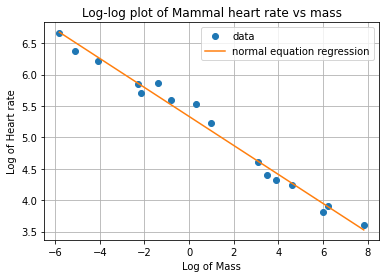

In [7]:
log_y_fit = B[0] + B[1]*log_x

plt.plot(log_x,log_y,'o',label = 'data')
plt.plot(log_x,log_y_fit,label = 'normal equation regression')
plt.xlabel('Log of Mass')
plt.ylabel('Log of Heart rate')
plt.title('Log-log plot of Mammal heart rate vs mass')
plt.grid()
plt.legend()
plt.show()

#### Approach 2: Use NumPy polyfit function, which performs least squares polynomial fit
Choose degree to be 1.
The *polyfit* function returns the coefficients in *decreasing* degree, so the first value is $\hat\beta_1$, and the second value is $\hat\beta_0$.

In [8]:
B_polyfit = np.polyfit(log_x, log_y, 1)
print(B_polyfit)
log_y_polyfit = B_polyfit[1] + B_polyfit[0]*log_x

[-0.23083782  5.33342695]


#### What if we fit a quadratic curve $\tilde y = c + m\tilde x + q \tilde x^2$ using least squares?

In [9]:
q,m,c = np.polyfit(log_x,log_y,2)
print(q,m,c)
log_y_polyfit2 = np.polyval([q,m,c], log_x)

-0.002269467134530023 -0.22680233216413972 5.369992576621943


Plot everything together

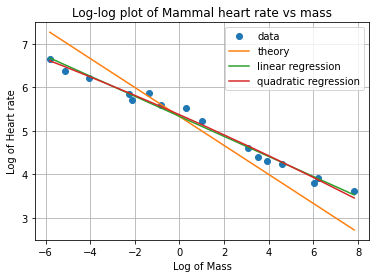

In [10]:
plt.plot(log_x,log_y,'o',label = 'data')
plt.plot(log_x,log_y_theory,label = 'theory')
plt.plot(log_x,log_y_polyfit,label = 'linear regression')
plt.plot(log_x,log_y_polyfit2,label = 'quadratic regression')
plt.xlabel('Log of Mass')
plt.ylabel('Log of Heart rate')
plt.title('Log-log plot of Mammal heart rate vs mass')
plt.grid()
plt.legend()
plt.show()